## Import packages

In [1]:
import psycopg2
import psycopg2.extras
import getpass

import os
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

from copy import deepcopy
import time

In [2]:
font = {'size' : 15}
mpl.rc('font', **font)

## Connect to database

In [3]:
dbuser = input("DB User: ")
dbpasswd = getpass.getpass("DB Password: ")

DB User:  mgraham
DB Password:  ············


In [4]:
db = psycopg2.connect(f"dbname='decat' user='{dbuser}' password='{dbpasswd}' host='decatdb.lbl.gov'")

In [5]:
db.autocommit = True # Makes the computer nicer about SQL syntax errors

In [6]:
cursor = db.cursor( cursor_factory = psycopg2.extras.DictCursor )

## Print table schema

In [7]:
tables = ['exposures','subtractions','objects','objectrbs','candidates']
for table in tables:
    query = "SELECT column_name, data_type FROM information_schema.columns WHERE table_name=%s"
    cursor.execute( query, ( table, ))
    print( f"\nTABLE: {table}\n===========================" )
    for row in cursor:
        print( f"{row['column_name']:24s}  :  {row['data_type']:s}" )


TABLE: exposures
id                        :  integer
created_at                :  timestamp without time zone
modified                  :  timestamp without time zone
ra                        :  double precision
dec                       :  double precision
gallat                    :  double precision
gallong                   :  double precision
header                    :  jsonb
filename                  :  text
mjd                       :  double precision
event_name                :  text
proposalid                :  text
camera_id                 :  integer
filter                    :  text

TABLE: subtractions
id                        :  integer
created_at                :  timestamp without time zone
modified                  :  timestamp without time zone
ra                        :  double precision
dec                       :  double precision
header                    :  jsonb
ra1                       :  double precision
dec1                      :  double precision
ra

## A simple first query, plot the sky locations of all the exposures

In [8]:
### query the exposures table and return 8 columns from it
query = "SELECT id, ra, dec, filename, mjd, filter, proposalid, header FROM exposures"
cursor.execute( query )
results = np.array( cursor.fetchall() ).transpose()

### Convert the query results into numpy arrays
exp_id  = np.asarray( results[0], dtype='int' )
exp_ra  = np.asarray( results[1], dtype='float' )
exp_dec = np.asarray( results[2], dtype='float' )
exp_fnm = np.asarray( results[3], dtype='str' )
exp_mjd = np.asarray( results[4], dtype='float' )
exp_fil = np.asarray( results[5], dtype='str' )
exp_pid = np.asarray( results[6], dtype='str' )
exp_hdr = np.asarray( results[7], dtype='str' )

### Clean up
del query, results

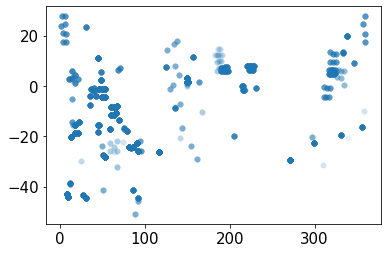

In [11]:
plt.plot( exp_ra, exp_dec, 'o', alpha=0.1, mew=0 )

We will have to ask Rob all what is in this database.

Exercises:
 * overplot as circles the locations of our DDFs.
 * plot distribution of filter values, how many exposures in griz, for example
 * plot cumulative number of exposures over days (mjd = modified julian date)
